<div class='bar_title'></div>

*Data Driven Decisions in Practice (D3IP): Urban Analytics*

# Case Study: Predicting AirBnB Accomodation Prices

Gunther Gust & Nikolai Stein

Data Driven Decisions (D3) Group <br>
Center for Artificial Intelligence & Data Science <br>



<img src="images/d3.png" style="width:20%; float:left;" />

<img src="images/CAIDASlogo.png" style="width:20%; float:left;" />

Complete the case study outlined by the steps below. Remember to always comment your code and document your findings so that your notebook is easy to read and follow! (Apart from correctness, the style of the notebook will also affect your grade!)



# PART 1: Data Loading and Exploratory Data Analysis

Insructions:

* Load the `airbnb.geojson` file into this notebook as a geodataframe
* Explore the content of each column of the geodataframe using methods of your choice (descriptive statistics, plots etc.). Describe your findings in the markdown cells.
* Create a plot that displays the location of the airbnb listings and the price. Add a basemap of San Diego to the plot.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt 
import seaborn as sns
import contextily as cx


In [2]:
# Load the geodataframe <insert your code here>....
airBnB = gpd.read_file("/workspaces/case-study-1-urban-analytics-nan-of-your-business/airbnb_listings.geojson")

In [3]:
airBnB.head()


,accommodates,bathrooms,bedrooms,beds,rt_Private_room,rt_Shared_room,pg_Condominium,pg_House,pg_Other,pg_Townhouse,price,geometry
0,5,2.0,2.0,2.0,0,0,0,1,0,0,425.0,POINT (-117.12971 32.75399)
1,6,1.0,2.0,4.0,0,0,1,0,0,0,205.0,POINT (-117.25253 32.78421)
2,2,1.0,1.0,1.0,1,0,0,0,0,0,99.0,POINT (-117.14121 32.75327)
3,2,1.0,1.0,1.0,1,0,0,1,0,0,72.0,POINT (-117.15269 32.93110)
4,2,1.0,1.0,1.0,1,0,0,1,0,0,55.0,POINT (-117.21870 32.74202)


In [4]:
print(airBnB.columns)

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'rt_Private_room',
       'rt_Shared_room', 'pg_Condominium', 'pg_House', 'pg_Other',
       'pg_Townhouse', 'price', 'geometry'],
      dtype='object')


In [5]:
print(airBnB.describe())

       accommodates    bathrooms     bedrooms         beds  rt_Private_room  \
count   6110.000000  6110.000000  6110.000000  6110.000000      6110.000000   
mean       4.220786     1.475286     1.589198     2.196399         0.298363   
std        2.840703     0.863803     1.136234     1.712917         0.457577   
min        1.000000     0.000000     0.000000     0.000000         0.000000   
25%        2.000000     1.000000     1.000000     1.000000         0.000000   
50%        4.000000     1.000000     1.000000     2.000000         0.000000   
75%        6.000000     2.000000     2.000000     3.000000         1.000000   
max       21.000000    10.000000    10.000000    16.000000         1.000000   

       rt_Shared_room  pg_Condominium    pg_House     pg_Other  pg_Townhouse  \
count     6110.000000     6110.000000  6110.00000  6110.000000   6110.000000   
mean         0.027987        0.090998     0.42144     0.087234      0.033879   
std          0.164949        0.287630     0.4938

In [6]:

variables = [
    "accommodates",  # Number of people it accommodates
    "bathrooms",  # Number of bathrooms
    "bedrooms",  # Number of bedrooms
    "beds",  # Number of beds
    # Below are binary variables, 1 True, 0 False
    "rt_Private_room",  # Room type: private room
    "rt_Shared_room",  # Room type: shared room
    "pg_Condominium",  # Property group: condo
    "pg_House",  # Property group: house
    "pg_Other",  # Property group: other
    "pg_Townhouse",  # Property group: townhouse
]

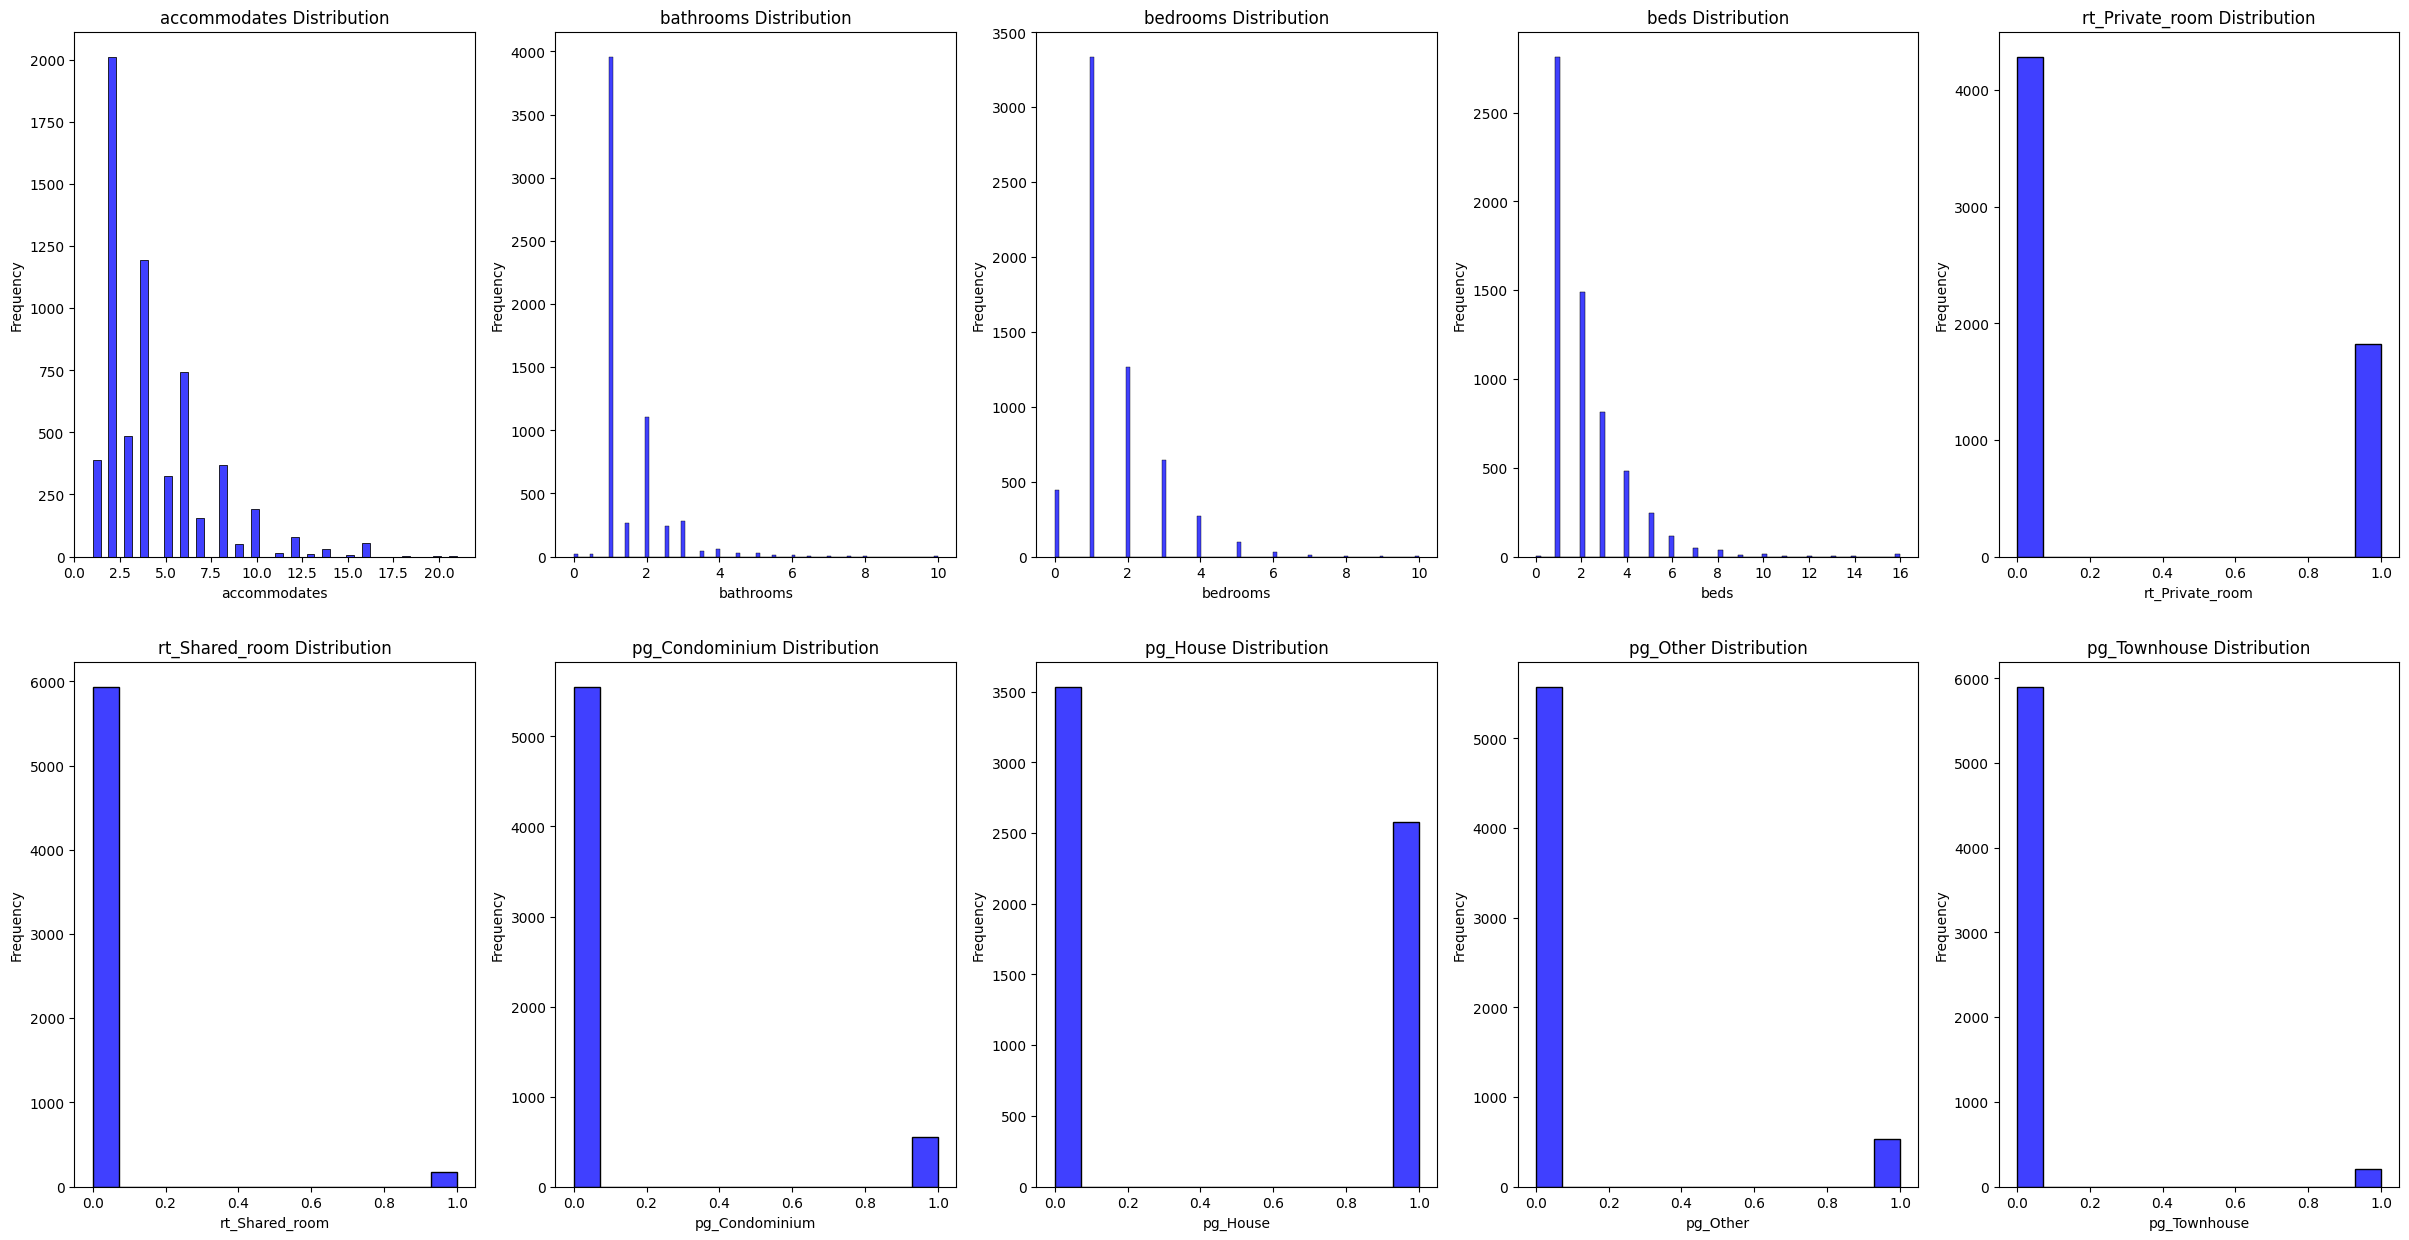

In [7]:
airBnB['log_price'] = np.log(airBnB['price'] + 1)  # +1 um Fehler bei Preis = 0 zu vermeiden

n_rows = 2
n_cols = (len(variables) + 1) // n_rows

# Create subplots
fig, ax = plt.subplots(n_rows, n_cols, figsize=(30, 15))

#variables = ['log_price', 'bedrooms', 'bathrooms', 'pg_House']
#fig, ax = plt.subplots(1, len(variables), figsize=(60, 15))
for idx, var in enumerate(variables):
    row = idx // n_cols
    col = idx % n_cols
    sns.histplot(airBnB[var], ax=ax[row, col], color='blue')
    ax[row, col].set_title(f'{var} Distribution')
    ax[row, col].set_xlabel(f'{var}')
    ax[row, col].set_ylabel('Frequency')

plt.show()


In [8]:

airBnB = airBnB.to_crs(epsg=3857)

for idx, var in enumerate(variables):
    row = idx // n_cols
    col = idx % n_cols

    # Plotting each point
    airBnB.plot(ax=ax[row, col], markersize=5, column=var, cmap='viridis', legend=True, 
            legend_kwds={'label': f'{var}', 'orientation': "horizontal"})
    ax[row, col].set_title(f'{var} of AirBnBs')
    ax[row, col].set_axis_off()

    # Adding a basemap correctly using the row and column indexing
    cx.add_basemap(ax=ax[row, col], crs=airBnB.crs.to_string())

# Show the plot
plt.show()


<Figure size 640x480 with 0 Axes>

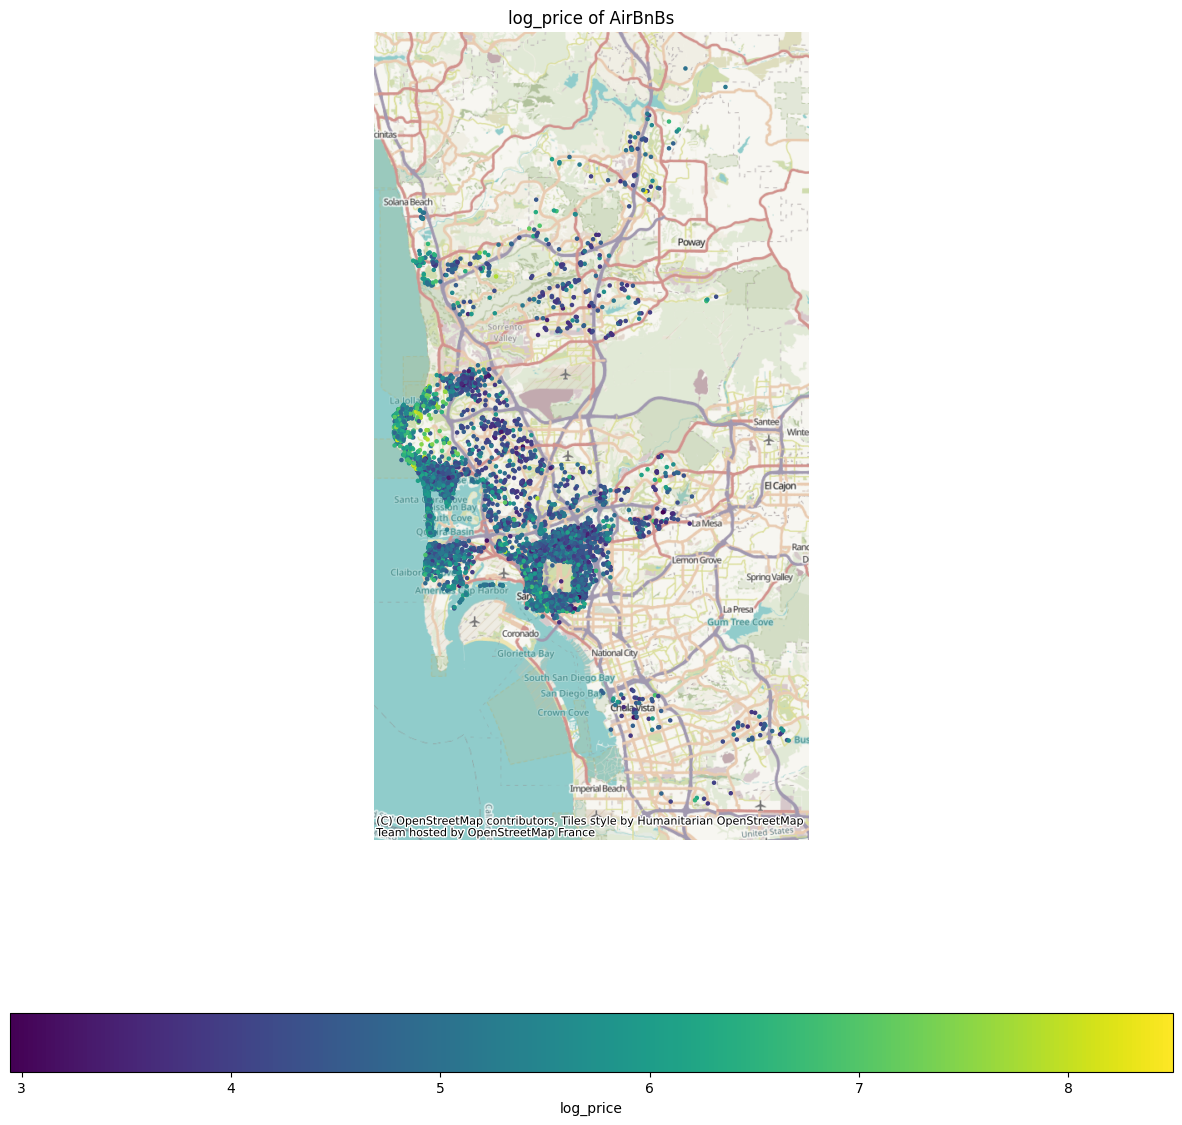

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))

airBnB.plot(ax=ax, markersize=5, column= 'log_price', cmap='viridis', legend=True, 
legend_kwds={'label': 'log_price', 'orientation': "horizontal"})
ax.set_title('log_price of AirBnBs')
ax.set_axis_off()
# Adding a basemap
cx.add_basemap(ax=ax)

# Show the plot
plt.show()

These are the variables you should analyze and later use to predict the `price`:

# PART 2 Feature Engineering: Get points-of-interest (POIs) and prepare them

Instructions:

* Use the method `features_from_address()` of osmnx to download POIs of the type `amenity` (select the types of amenities to include from this list here: https://wiki.openstreetmap.org/wiki/Key:amenity)
* Pay attention to set the `dist` parameter to an appropiate value 

In [10]:
import osmnx as ox

In [28]:
# Download the POI data <your code here> ...
#pois = ox.features_from_address(address, tags=tags, dist=1000)  # 1000 meters buffer around the address
pois = ox.features_from_address(
    "San Diego, USA", dist = 30000, tags={'amenity': ['restaurant', 'cafe', 'hospital', 'ice cream', 'brothel', 'nightclub', 'stripclub']}
)


In [18]:
pois.head()

addr:city addr:housenumber addr:postcode addr:state  \
element_type osmid                                                            
node         286316702  San Diego              721         92101         CA   
             297819169  San Diego              222         92101         CA   
             356534762        NaN              947           NaN        NaN   
             365318235  San Diego              547         92102        NaN   
             366731027    Tijuana              NaN           NaN        NaN   

                                       addr:street     amenity  \
element_type osmid                                               
node         286316702                  9th Avenue  restaurant   
             297819169               Island Avenue  restaurant   
             356534762                    E Street  restaurant   
             365318235                 25th Street  restaurant   
             366731027  Avenida José Maria Velasco  restaurant   

                                  name                     geometry  \
element_type osmid                                                    
node         286316702  Wicked Chicken  POINT (-117.15631 32.71273)   
             297819169        Cafe 222  POINT (-117.16267 32.71056)   
             356534762           Pokéz  POINT (-117.15576 32.71458)   
             365318235             NaN  POINT (-117.13990 32.71140)   
             366731027       Cien Años  POINT (-117.01155 32.52346)   

                       changing_table             cuisine  ...  \
element_type osmid                                         ...   
node         286316702            NaN                 NaN  ...   
             297819169            yes  breakfast;sandwich  ...   
             356534762            NaN             mexican  ...   
             365318235            NaN                 NaN  ...   
             366731027            NaN                 NaN  ...   

                       protection_title ref:nrhp payment:cheque cafe  \
element_type osmid                                                     
node         286316702              NaN      NaN            NaN  NaN   
             297819169              NaN      NaN            NaN  NaN   
             356534762              NaN      NaN            NaN  NaN   
             365318235              NaN      NaN            NaN  NaN   
             366731027              NaN      NaN            NaN  NaN   

                       amenity_1 fast_food healthcare:for male  \
element_type osmid                                               
node         286316702       NaN       NaN            NaN  NaN   
             297819169       NaN       NaN            NaN  NaN   
             356534762       NaN       NaN            NaN  NaN   
             365318235       NaN       NaN            NaN  NaN   
             366731027       NaN       NaN            NaN  NaN   

                       building:material year_of_construction  
element_type osmid                                             
node         286316702               NaN                  NaN  
             297819169               NaN                  NaN  
             356534762               NaN                  NaN  
             365318235               NaN                  NaN  
             366731027               NaN                  NaN  

[5 rows x 217 columns]

Data cleaning: The resulting `pois` geodataframe may have a composite row index. In addition, some POIs may be of a strange element_type. You can use the following code to eliminate these issues.

In [29]:
# Clean the POI data
pois.reset_index(inplace=True) # reset the index of the data frame
pois = pois[pois.element_type=="node"] # eliminate all POIs that are not of the type "node"
pois.head() # check the results

,element_type,osmid,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,amenity,name,geometry,...,protection_title,ref:nrhp,payment:cheque,cafe,amenity_1,fast_food,healthcare:for,male,building:material,year_of_construction
0,node,286316702,San Diego,721,92101,CA,9th Avenue,restaurant,Wicked Chicken,POINT (-117.15631 32.71273),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,297819169,San Diego,222,92101,CA,Island Avenue,restaurant,Cafe 222,POINT (-117.16267 32.71056),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,356534762,NaN,947,NaN,NaN,E Street,restaurant,Pokéz,POINT (-117.15576 32.71458),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,365318235,San Diego,547,92102,NaN,25th Street,restaurant,NaN,POINT (-117.13990 32.71140),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,366731027,Tijuana,NaN,NaN,NaN,Avenida José Maria Velasco,restaurant,Cien Años,POINT (-117.01155 32.52346),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Instructions:
* Plot the POIs spatially (use again a background map of San Diego)
* When you use POIs of different amenity types, color the POIs differently

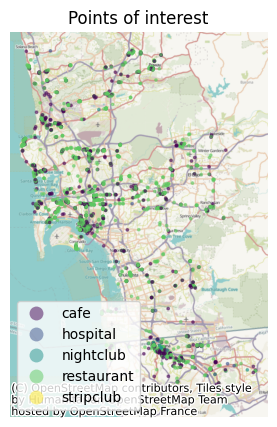

In [34]:
# <Your code here>

pois = pois.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(5,5))

pois.plot(ax=ax, markersize=3, alpha=0.5, column= 'amenity', cmap='viridis', legend=True) 
ax.set_title('Points of interest')
ax.set_axis_off()
# Adding a basemap
cx.add_basemap(ax=ax)

# Show the plot
plt.show()

For each POI amenity type, create a kernel density estimation (KDE):
* Convert the `geometry` of the POI into a suitable coordinate data format (you may use the provided function `create_coordinate_array` for this)
* Feed the resulting coordinates into the `gaussian_kde` function and estimate the function
* Also convert the `geometry` of the Airbnb listings into the coordinate data format (you may use the provided function `create_coordinate_array` for this)
* Using the converted Airbnb geometries, compute the KDE for the locations of the Airbnb listings
* Add the KDE estimate as additional columns to your original airbnb geodataframe

In [39]:
from scipy.stats import gaussian_kde

In [40]:
# helper function to convert the geometries into a suitable coordinate format for the KDE
def create_coordinate_array(geometries): 
    x_values = []
    y_values = []

# Iterate through each row in the GeoDataFrame
    for multipoint in geometries:
        # Ensure the geometry is indeed MultiPoint; if it's just a single Point, wrap it in a list
        points = list(multipoint.geoms) if hasattr(multipoint, "geoms") else [multipoint]
        
        # For each Point in the MultiPoint, extract x and y values
        for point in points:
            x_values.append(point.x)
            y_values.append(point.y)

    # Optionally, convert the lists to numpy arrays for further processing
    x_values = np.array(x_values)
    y_values = np.array(y_values)

    # Rearrange data to create a 2D array of x and y coordinates
    xy = np.vstack([x_values,y_values])

    return xy, x_values, y_values


# Example Usage for the Airbnb geodataframe
pois_array, x_values, y_values = create_coordinate_array(pois.geometry)

AttributeError: 'numpy.ndarray' object has no attribute 'geometry'

In [ ]:
#<Your code here>
kde = gaussian_kde(pois_array)

# Define the grid points where you want to calculate the density
xmin, xmax = x_values.min(), x_values.max()
ymin, ymax = y_values.min(), y_values.max()
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j] #generate 100 evenly spaced points between min and max

# Evaluate the density at grid points
density = kde(np.vstack([xx.ravel(), yy.ravel()]))
density = density.reshape(xx.shape) # reshape to the original shape of xx (for plotting)

Create a spatial point plot(s) of the Airbnb listings and color the points according to the KDE estimates, in order to check your results.

In [ ]:
# <your code here>

# PART 3: Modeling and Analysis (aka Machine Learning)

Use your dataset generated in the previous steps to predict AirBnb prices

Instructions:

* Split your data set into training and validation data sets
* Define an error metric (or several)
* Train at least one machine learning model (e.g. random forest) 
* Tune the hyperparameters (if applicable for the model)
* Evaluate the accuracy of the predicted prices against actual prices
* Compare the performance of the previous models when using different input data sets (benchmarks). Make sure to include the naive benchmark of predicting always the mean price.

In [ ]:
from sklearn.model_selection import train_test_split

X = ""
y = ""

## Model 1: Trivial Baseline

In [ ]:
# Trivial baseline: Predict always the mean price 
# <your code here>

## Model 2: ...

In [ ]:
# <your code here>

## Model 3: ...